## MNIST 의 손글씨를 인공신경망을 이용한 딥러닝으로 구별해보자

별도의 필터링 없이 keras 에서 제공하는 함수만을 사용해서 정석대로 구현 하는 예제

In [4]:
import tensorflow
import tensorflow.keras as keras
import numpy 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [7]:
input_shape = (28, 28) # 이미지 한장의 크기
number_of_classes = 10 # 손글씨 종류는 0 ~ 9 까지 10개

생각보다 이걸 그대로 넣는 것보다 0~1로 scaling 을 해주면 성능이 대폭 상승함을 확인할 수 있다. 이번에는 모든 숫자를 모두 맞추는게 목표인 모델이므로 sckit learn 의 one-hot encoder 대신에 keras 자체적으로 가지고 있는 to_categorical 을 사용해서 일괄 변환한다 (어차피 0, 1, 2, 3, 4 ... 같은 숫자를 [1,0...] 같은 벡터로 바꿔주는 일을 한다는 점은 동일하다)

In [8]:
# 0~1 scaling 
x_train = x_train / 255.0
x_test = x_test / 255.0

# one hot encoding 
y_train = keras.utils.to_categorical(y_train, num_classes= number_of_classes)
y_test = keras.utils.to_categorical(y_test, num_classes= number_of_classes)

In [42]:
x_train.shape

(60000, 28, 28)

In [43]:
y_train.shape

(60000, 10)

keras.utils 에서 제공하는 모듈을 통해 한 번에 category로 변환을 했다. 처음 5개를 확인해보면 아래와 같이 one-hot encoding이 잘 되었음을 확인할 수 있다.

In [11]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

간단한 모델을 만들어보자, 일단 별도의 전처리 없이 주어진 28*28 이미지를 그대로 쭉 펼쳐서(Flatten) 784 개로 만들고, 이걸 점차적으로 128, 64, 32 그리고 최종 출력층이 10개인 (y_train/y_test와 모양이 같은) 모델을 만들어 준다. 마지막 출력층은 y_train/y_test 와 같이 값이 0~1인 확률 분포처럼 만들어주기 위하여 softmax 함수를 사용했다.

In [14]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(input_shape= input_shape) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 128 ) )
model.add( keras.layers.Dense( 64, activation='relu' ))
model.add( keras.layers.Dense( 32, activation='relu' ))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

컴파일을 위해 로스함수는 크로스엔트로피를, 옵티마이저는 adam, 마지막으로 metric 으로 accuracy 를 같이 계산하게 설정했다.

In [15]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7377 - loss: 0.8958 - val_accuracy: 0.9495 - val_loss: 0.1847
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9398 - loss: 0.2050 - val_accuracy: 0.9623 - val_loss: 0.1372
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9538 - loss: 0.1550 - val_accuracy: 0.9660 - val_loss: 0.1197
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9650 - loss: 0.1190 - val_accuracy: 0.9657 - val_loss: 0.1179
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9673 - loss: 0.1081 - val_accuracy: 0.9712 - val_loss: 0.0996
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9737 - loss: 0.0869 - val_accuracy: 0.9720 - val_loss: 0.0952
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9783 - loss: 0.0740 - val_accuracy: 0.9735 - val_loss: 0.0948
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9787 - loss: 0.0704 - val_accuracy: 0.

In [16]:
model.evaluate(x = x_test, y = y_test )

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 474us/step - accuracy: 0.9691 - loss: 0.1197


[0.10669538378715515, 0.9714000225067139]

학습을 돌린 결과, Train set 에 대해서는 99%, 그리고 약 10%의 validaiton 에 대해서는 97% 의 정답율을 보여주었으며, Test set 에 대해서도 evaluation을 진행하면 대략 97%에 가까운 결과를 보여준다.

모델을 설계한 것 외에는 아무런 사전 지식이나 별도의 Domain Knowledge를 넣어주지 않았음에도 나름 높은 정확도를 보여줌을 확인할 수 있다.

특히 그중에서도 특기할 점은, 우리가 주어지는 데이터가 이미지인지, 일반 벡터인지, 어떤 종류의 데이터인지도 알려주지 않았음에도 매우 훌륭한 정확도를 가진 모델이 만들어진다는 점이다. 

우리가 처음 수동으로 8과 9를 비교할 때에 이런 저런 사전 지식(8의 특징, 9의 특징) 등을 Rule 로 만들어 구분하는 구분기를 만든 점과 매우 대비된다.

이렇게 딥러닝 모델의 경우

  - 충분히 많은 데이터와 라벨이 있고
  - 모델을 충분히 복잡하게 만들고 (표현력이 충분하고)
  - 정답과 오답에 대한 정의 (Loss Function을 제대로 구현)할 수 만 있다면

그외의 별도 사전 지식이나 문제에 대한 이해가 없어도 스스로 학습을 하며, 이 과정에서 특징 추출(Feature Extraction)을 스스로 한다는게 가장 중요한 차이점이다.
  

다만 지금 같은 경우에는 28*28 이라는 정해진 사이즈의 이미지만 계속 학습했는데, 이걸 아래와 같이 50 * 50 이미지에 덧 씌운 케이스를 생각해보자

먼저 아래와 같은 함수를 정의한다. (주어진 이미지를 50*50 캔버스에 임의로 붙여넣기)

In [17]:
def overwrite_mnist_image( image_of_28_28 ):
    canvas = np.random.uniform(0, 0.1, (50,50))
    x_shift = np.random.randint(1, 21) 
    y_shift = np.random.randint(1, 21) 
    canvas[ x_shift:x_shift+28 ,  y_shift:y_shift+28 ] =  canvas[ x_shift:x_shift+28 ,  y_shift:y_shift+28 ] + image_of_28_28
    return canvas 


In [18]:
enlarged_x_train = []
enlarged_x_test = [] 

for i in range(len(x_train)):
    enlarged_x_train.append(overwrite_mnist_image(x_train[i]))

for i in range(len(x_test)):
    enlarged_x_test.append(overwrite_mnist_image(x_test[i]))

enlarged_x_train = np.array(enlarged_x_train)
enlarged_x_test = np.array(enlarged_x_test)


이렇게 옮겨붙인 이미지를 그려보면 아래와 같다.

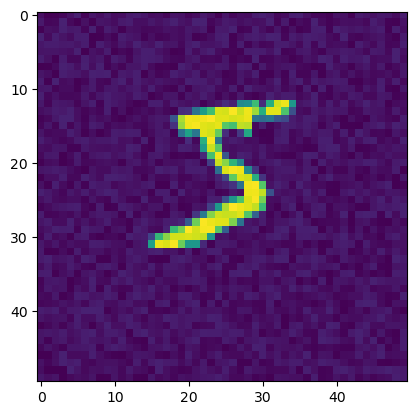

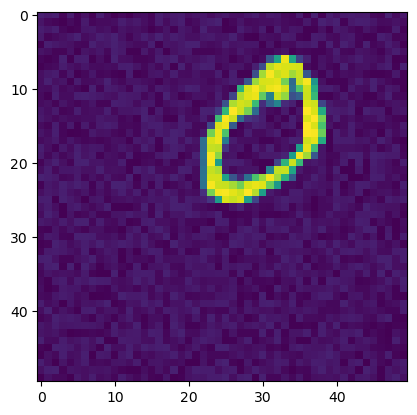

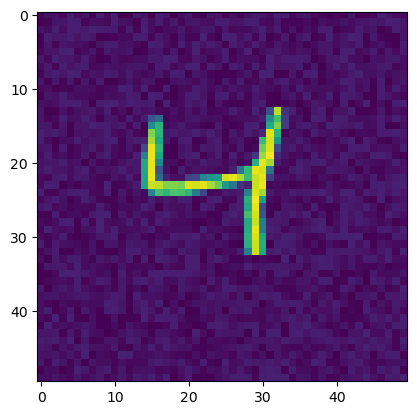

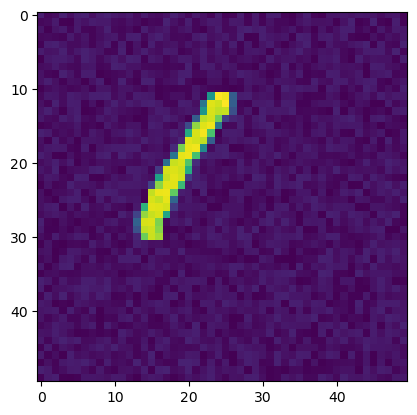

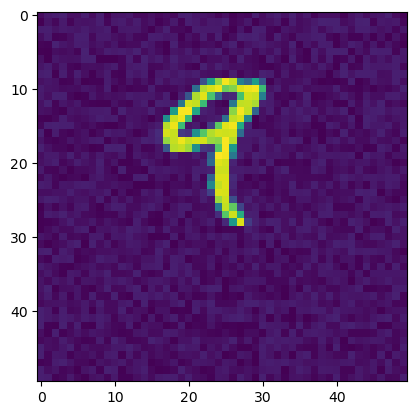

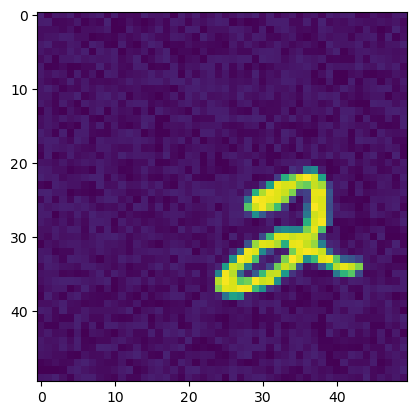

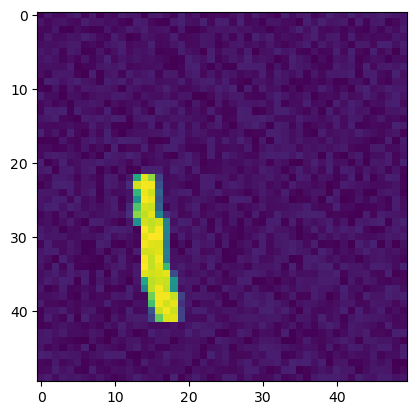

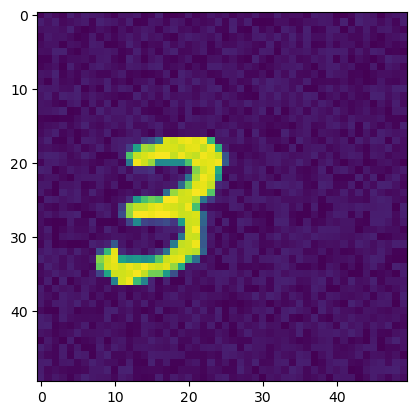

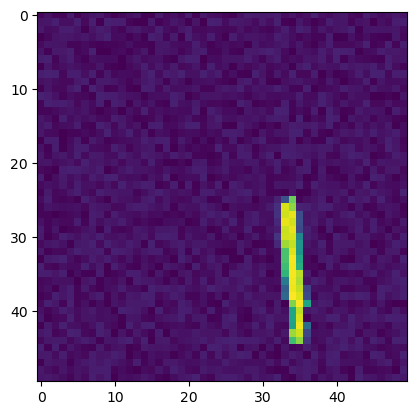

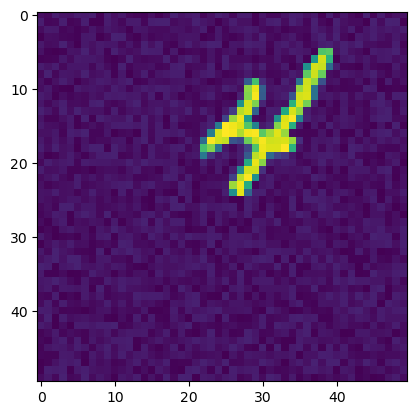

In [20]:
for i in range(10):
    fig = enlarged_x_train[i] 
    plt.imshow(fig)
    plt.show()

같은 모델에서 학습이 가능할까?

모델 자체의 구조는 위와 똑같이 하되, 들어가는 이미지의 크기만 바꿔준다. (사실 InputLayer 는 생략이 가능하기 때문에 위 부분을 삭제하고 완전히 똑같이 사용해도 별 무리는 없다.)

In [21]:
model = keras.Sequential()

model.add( keras.layers.InputLayer(input_shape= (50,50) ))
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense( 128 ) )
model.add( keras.layers.Dense( 64, activation='relu' ))
model.add( keras.layers.Dense( 32, activation='relu' ))
model.add( keras.layers.Dense( 10, activation='softmax' ))

model.summary()

c:\Users\msong\anaconda3\envs\py3_11_8\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 2500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       320,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 330,794 (1.26 MB)

 Trainable params: 330,794 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(enlarged_x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2630 - loss: 2.0283 - val_accuracy: 0.6113 - val_loss: 1.1795
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6375 - loss: 1.0788 - val_accuracy: 0.7298 - val_loss: 0.8236
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7412 - loss: 0.7852 - val_accuracy: 0.7805 - val_loss: 0.6738
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7901 - loss: 0.6472 - val_accuracy: 0.8007 - val_loss: 0.6190
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8223 - loss: 0.5559 - val_accuracy: 0.8153 - val_loss: 0.5747
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8451 - loss: 0.4899 - val_accuracy: 0.8250 - val_loss: 0.5437
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8590 - loss: 0.4482 - val_accuracy: 0.8325 - val_loss: 0.5111
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8731 - loss: 0.4030 - val_accuracy: 0.

In [23]:
model.evaluate(enlarged_x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 725us/step - accuracy: 0.8251 - loss: 0.6871


[0.6003456711769104, 0.845300018787384]

분류 결과 y_test 에 대해서 정합도가 82% 로 낮아졌다. 물론 이 자체도 나름 높은 값이라고 할 수 있지만, 종전의 97%에 달하는 분류 결과에 비하면 오답율이 3%에서 18%로 거의 5배 이상 커졌다고 할 수 있다. 손글씨의 모양이 바뀐 게 아니건만, 단순히 글씨가 쓰여지는 위치가 바뀌었다는 것 만으로 성능이 확 떨어졌다는게 다소 의외로 느껴질 수 도 있다.


하지만 이는 어찌보면 당연할 수 도 있는데, 우리의 모델은 Feature Extraction 을 자동으로 하면서, 왜 이게 1인지, 왜 이게 7인지 이해를 하고 학습을 한 게 아니라, 784개로 쭉 이어붙여진 Vector 에서 특정 값이 특정 값보다 거나, 초반 부분이 후반 부분보다 작거나 하면 Label 이 7일 가능성이 높다. 이런식으로 학습을 해 나갔기 때문에 그 위치가 섞이면서 자연스럽게 성능이 떨어진 것이다.

이렇게 (특히 이미지에서) 어떤 위치의 횡/종 이동, 또는 Scale 확대/축소에 무관하게(Robust하게) 이미지를 인식하기 위해서는, 이런 위치에 의한 효과를 없애주어야 하는데, 이를 위해 개발된 획기적인 방법이 바로 CNN 이며, 이를 다음에 설명하도록 하겠다.